In [5]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def plot_true_2d(x,Mu,sigma):

    fig1 = plt.figure(figsize=(6,6))
    ax1 = fig1.add_subplot(1,1,1)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    fig1.suptitle('2D true density')

    f0 = np.linspace(x[:,0].min(),x[:,0].max())
    f1 = np.linspace(x[:,1].min(),x[:,1].max())
    X, Y = np.meshgrid(f0,f1)

    for c in range(3):
        def pdf(point):
            part1 = 1 / (2* np.pi) * (np.linalg.det(sigma[c])**(1/2))
            part2 = (-1/2) * ((point - Mu[c]).T @ (np.linalg.inv(sigma[c]))) @((point-Mu[c]))
            return float(part1 * np.exp(part2))
        z = np.array([pdf(np.array(ponit)) for ponit in zip(np.ravel(X),np.ravel(Y))])
        Z = z.reshape(X.shape)
        ax1.contour(X, Y, Z,colors=color[c])

def plot_true_3d(x,Mu,sigma):

    fig2 = plt.figure(figsize=(6,6))
    ax2 = plt.axes(projection='3d')
    fig2.suptitle('3D true density')
    ax2.view_init(10,-100)
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_zlabel("P(X)")

    f0 = np.linspace(x[:,0].min(),x[:,0].max())
    f1 = np.linspace(x[:,1].min(),x[:,1].max())
    X, Y = np.meshgrid(f0,f1)

    for c in range(3):
        def pdf(point):
            part1 = 1 / (2* np.pi) * (np.linalg.det(sigma[c])**(1/2))
            part2 = (-1/2) * ((point - Mu[c]).T @ (np.linalg.inv(sigma[c]))) @((point-Mu[c]))
            return float(part1 * np.exp(part2))
        z = np.array([pdf(np.array(ponit)) for ponit in zip(np.ravel(X),np.ravel(Y))])
        Z = z.reshape(X.shape)

        #ax2.plot_surface(X, Y,Z,alpha=.3,rstride=1,cstride=1,color=color[c],edgecolor='none')
        ax2.contour3D(X, Y, Z,60, colors=color[c])



def parzen_window_est(x_samples, h, center):

    dimensions = x_samples.shape[1]
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / (len(x_samples)*(h**dimensions)))

def area(data):
    size = 30
    X = []
    a = min(data[:,0].min(),data[:,1].min())
    b = max(data[:,0].max(),data[:,1].max())

    for i in range(data.shape[1]):
        x=np.linspace(a,b, size)
        X.append(x)
    return np.array(X)

def parzen(data, h):
    X = area(data)
    size = [len(X[0]), len(X[1])]
    parzenpdf = np.zeros(size)
    n=len(data)
    for i in range(size[0]):
        for j in range(size[1]):
            x = np.array([X[0][i],X[1][j]])
            p = parzen_window_est(data,h,x)
            parzenpdf[i,j] = p
    return X, parzenpdf


def plotparzen(class1,class2,class3):

    h_set = np.array([0.09, 0.3, 0.6])

    fig2d = plt.figure(figsize=(6,6))
    fig3d = plt.figure(figsize=(10,6))
    fig2d.suptitle('2D hypercube-parzenwindow')
    fig3d.suptitle('3D hypercube-parzenwindow')

    pos = 1

    for h in h_set :
        title = "h = %f" % (h)
        ax2d = fig2d.add_subplot(1, 3, pos)
        ax3d = fig3d.add_subplot(1, 3, pos,projection='3d')
        ax3d.view_init(10,-100)
        pos = pos + 1

        for i in range(0,3):
            if(i==0):
                X,P = parzen(class1, h)
                px, py = np.meshgrid(X[0], X[1])
                ax2d.contour(px, py, P,colors=color[i])
                ax3d.plot_surface(px, py,P,alpha=.3,rstride=1,cstride=1,color=color[i],edgecolor='none')
                ax3d.contour3D(px, py,P,60, colors=color[i])

            if(i==1):
                X,P = parzen(class2, h)
                px, py = np.meshgrid(X[0], X[1])
                ax2d.contour(px, py, P,colors=color[i])
                ax3d.plot_surface(px, py,P,alpha=.3,rstride=1,cstride=1,color=color[i],edgecolor='none')
                ax3d.contour3D(px, py,P,60, colors=color[i])

            if(i==2):
                X,P = parzen(class3, h)
                px, py = np.meshgrid(X[0], X[1])
                ax2d.contour(px, py, P,colors=color[i])
                ax3d.plot_surface(px, py,P,alpha=.3,rstride=1,cstride=1,color=color[i],edgecolor='none')
                ax3d.contour3D(px, py,P,60, colors=color[i])


        ax2d.set_xlabel('X1')
        ax2d.set_ylabel('X2')
        ax2d.set_title(title)
        ax3d.set_zlabel('P(X)')
        ax3d.set_ylabel('Y')
        ax3d.set_xlabel('X')
        ax3d.set_title(title)


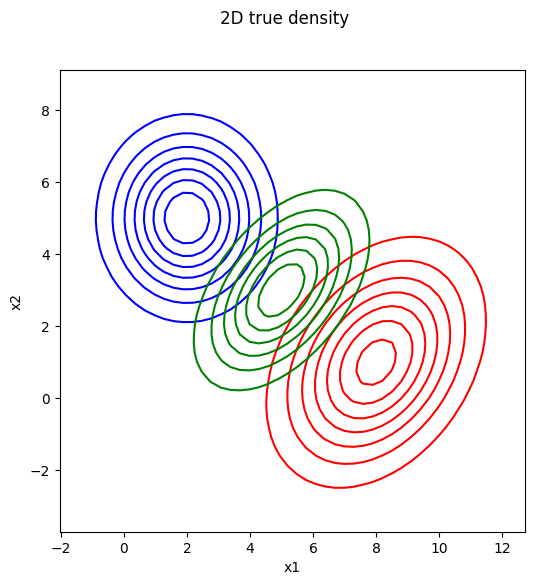

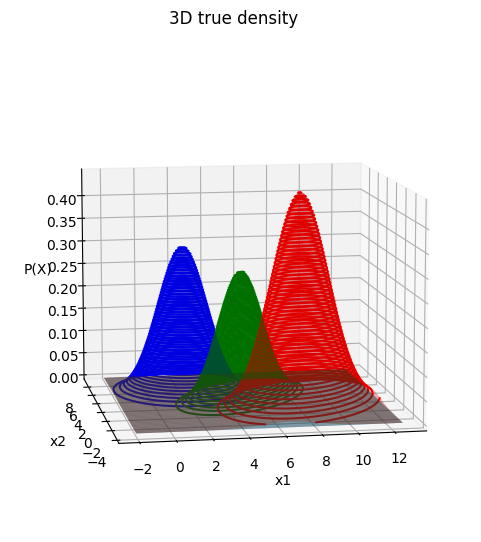

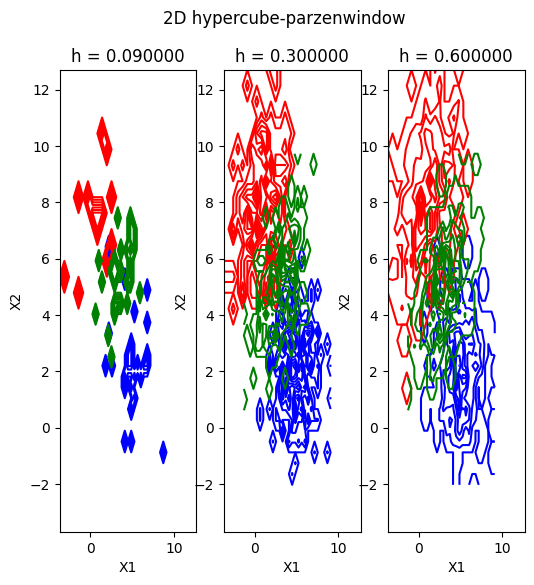

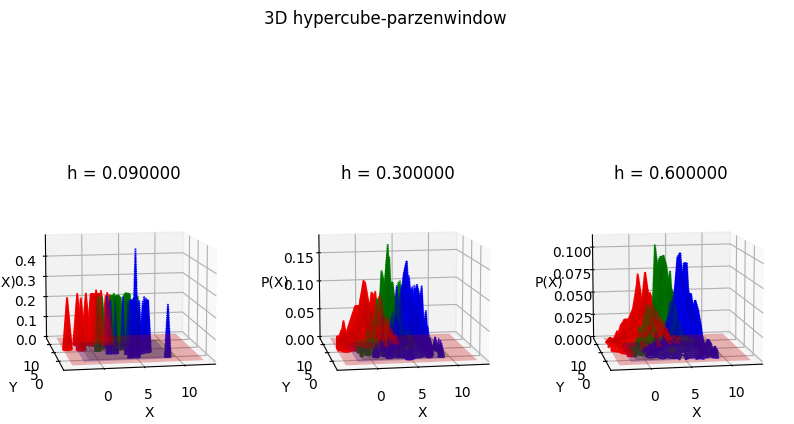

In [18]:
N = 500

mu1 = np.array([2,5])
mu2 = np.array([8,1])
mu3 = np.array([5,3])
means = [None] * 3
means[0] = mu1
means[1] = mu2
means[2] = mu3

cov1 = np.array([[2,0],[0,2]])
cov2 = np.array([[3,1],[1,3]])
cov3 = np.array([[2,1],[1,2]])
covariances = [None] * 3
covariances[0] = cov1
covariances[1] = cov2
covariances[2] = cov3

class1 = np.random.multivariate_normal(mu1, cov1, N)
class2 = np.random.multivariate_normal(mu2, cov2, N)
class3 = np.random.multivariate_normal(mu3, cov3, N)

data = np.concatenate([class1, class2 , class3 ], axis=0)

color = ['blue','red','green']


plot_true_2d(data,means,covariances)
plot_true_3d(data,means,covariances)
plotparzen(class1,class2,class3)
plt.show()